In [45]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
#from keras_preprocessing import image
#import keras_preprocessing.image
from tensorflow.keras.utils import load_img, img_to_array
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.layers import BatchNormalization
#import cv2 as cv

In [46]:
import os
PATH = "B:\\somestuff\\simrise\\blalba\\new_tool\\images\\"
PATHPOOL = "B:\\somestuff\\simrise\\blalba\\new_tool\\images\\pool_gray\\"
FILESPOOL = next(os.walk(PATHPOOL),(None,None,[]))[2]
os.chdir(PATH)
SIZE = 200

In [47]:
dataframe = pd.read_csv(f"{PATH}\\out_gray.csv")
#dataframe = dataframe.applymap(str)
dataframe.head(5)

,Id,Bypass Diode,Junction Box,MHotspot,SHotspot
0,rgb1_gray_IMGT0037.PNG,0,0,0,0
1,rgb1_gray_IMGT0039.PNG,0,0,0,0
2,rgb1_gray_IMGT0068.PNG,0,0,0,0
3,rgb1_gray_IMGT0070.PNG,0,0,0,0
4,rgb1_gray_IMGT0072.PNG,0,0,0,0


In [48]:
dataframe.shape


(1004, 5)

In [49]:
dataframe.head()

,Id,Bypass Diode,Junction Box,MHotspot,SHotspot
0,rgb1_gray_IMGT0037.PNG,0,0,0,0
1,rgb1_gray_IMGT0039.PNG,0,0,0,0
2,rgb1_gray_IMGT0068.PNG,0,0,0,0
3,rgb1_gray_IMGT0070.PNG,0,0,0,0
4,rgb1_gray_IMGT0072.PNG,0,0,0,0


In [50]:
#X_npImageAll = np.array([cv.imread(f"{PATHPOOL}\\{img}") for img in FILESPOOL]);
#X_npImageAll = dataframe['Id']
#X_npImageAll
i = 0
X_npImageAll = list()
for f in dataframe.iloc[:,0]:
    img = load_img(f"{PATHPOOL}\\{f}\\",target_size=(SIZE,SIZE,3))
    img = img_to_array(img)
    img = img / 255.0
    X_npImageAll.append(img)

X_npImageAll = np.array(X_npImageAll)
#X_npImageAll
    
    

In [51]:
X_npImageAll.shape

(1004, 200, 200, 3)

In [52]:
y_trainDataframe = dataframe.drop(['Id'], axis=1)

In [53]:
y_trainDataframe.head()

,Bypass Diode,Junction Box,MHotspot,SHotspot
0,0,0,0,0
1,0,0,0,0
2,0,0,0,0
3,0,0,0,0
4,0,0,0,0


In [54]:
y_trainDataframe.shape

(1004, 4)

In [55]:
X_train,X_test,y_train,y_test = train_test_split(X_npImageAll, y_trainDataframe, random_state=20,test_size=0.3)

In [56]:
model = Sequential()


In [57]:

model.add(Conv2D(filters=16, kernel_size=(5, 5), activation="relu", input_shape=(SIZE,SIZE,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(filters=32, kernel_size=(5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Conv2D(filters=64, kernel_size=(5, 5), activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Conv2D(filters=64, kernel_size=(5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(2**7, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2**6, activation='relu'))
model.add(Dropout(0.5))
#model.add(Dense(2**10, activation='relu'))
#model.add(Dropout(0.3))

#model.add(Dense(2**8, activation='relu'))
#model.add(Dropout(0.2))

model.add(Dense(2**2, activation='sigmoid'))




In [58]:
#model.summary()

In [59]:

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [60]:

history = model.fit(X_train, y_train, epochs=80, validation_data=(X_test, y_test), batch_size=10)




Epoch 1/80
71/71 [==============================] - 26s 345ms/step - loss: 0.2171 - accuracy: 0.2393 - val_loss: 2.9803e-05 - val_accuracy: 0.0000e+00
Epoch 2/80
71/71 [==============================] - 23s 324ms/step - loss: 0.0271 - accuracy: 0.2493 - val_loss: 4.0581e-08 - val_accuracy: 0.0861
Epoch 3/80
71/71 [==============================] - 21s 299ms/step - loss: 0.0158 - accuracy: 0.2578 - val_loss: 1.3400e-10 - val_accuracy: 0.0000e+00
Epoch 4/80
71/71 [==============================] - 21s 297ms/step - loss: 0.0073 - accuracy: 0.2564 - val_loss: 6.4026e-11 - val_accuracy: 0.0000e+00
Epoch 5/80
71/71 [==============================] - 22s 304ms/step - loss: 0.0048 - accuracy: 0.2692 - val_loss: 2.7546e-12 - val_accuracy: 0.2185
Epoch 6/80
71/71 [==============================] - 23s 319ms/step - loss: 0.0053 - accuracy: 0.2664 - val_loss: 3.1623e-13 - val_accuracy: 0.0364
Epoch 7/80
71/71 [==============================] - 23s 321ms/step - loss: 0.0030 - accuracy: 0.2977 - val

71/71 [==============================] - 24s 334ms/step - loss: 3.1699e-10 - accuracy: 0.2578 - val_loss: 4.4517e-22 - val_accuracy: 0.0695
Epoch 56/80
71/71 [==============================] - 23s 325ms/step - loss: 2.0603e-08 - accuracy: 0.2821 - val_loss: 2.1622e-22 - val_accuracy: 0.0629
Epoch 57/80
71/71 [==============================] - 23s 318ms/step - loss: 1.3559e-10 - accuracy: 0.2692 - val_loss: 1.9639e-22 - val_accuracy: 0.0629
Epoch 58/80
71/71 [==============================] - 23s 329ms/step - loss: 2.1884e-10 - accuracy: 0.2778 - val_loss: 1.7736e-22 - val_accuracy: 0.0596
Epoch 59/80
71/71 [==============================] - 23s 325ms/step - loss: 4.6313e-11 - accuracy: 0.2692 - val_loss: 1.5056e-22 - val_accuracy: 0.0596
Epoch 60/80
71/71 [==============================] - 24s 343ms/step - loss: 2.5165e-10 - accuracy: 0.2778 - val_loss: 1.4400e-22 - val_accuracy: 0.0497
Epoch 61/80
71/71 [==============================] - 25s 345ms/step - loss: 1.3811e-11 - accuracy: 0

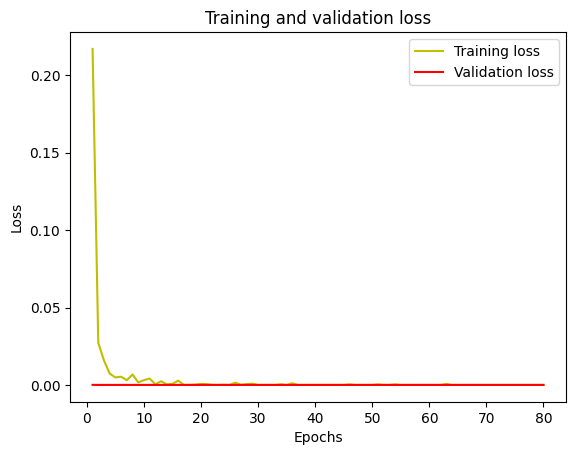

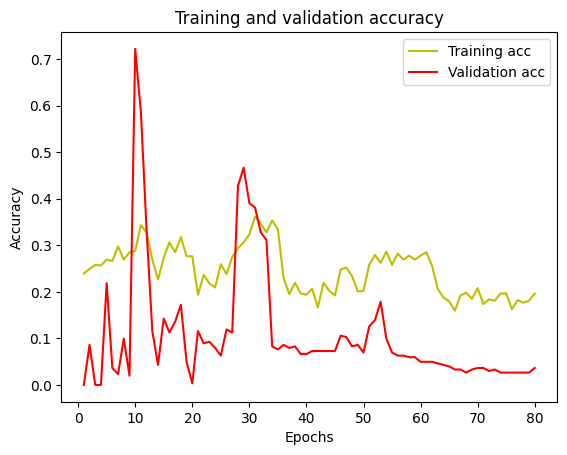

In [61]:

#plot the training and validation accuracy and loss at each epoch
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

#print("")